**Gabriel Mendes, Gabriela Freitas e Moises Gonçalves**

# **Introdução**

O objetivo do nosso trabalho é fazer uma analise quantitativa das criptomoedas e através disso observar sua movimentação, retorno, risco e correlação.

Escolhemos quatro criptomoedas que possuem Smart Contract, plataformas de contratos inteligente feitas de forma descentralizadas, e que são relevantes nessa área e gostariamos de ver a interação entre elas.

In [ ]:
# Importar as Bibliotecas que serão (ou seriam hahaha) utilizadas ao longo do trabalho
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
# Para ler os dados do yahoo
from pandas_datareader.data import DataReader
# For time stamps
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go


In [ ]:

from google.colab import files
  
  
uploaded = files.upload()

Saving ADA.csv to ADA (1).csv
Saving BNB.csv to BNB (1).csv
Saving ETH.csv to ETH (1).csv
Saving MATIC.csv to MATIC (1).csv


# **Moedas**

Agora, iremos importar os dados das criptomoedas e montar seus respectivos dataframes

In [ ]:
# Importar ADA
def analisedados(dates):
  return pd.datetime.strptime(dates, '%Y-%m-%d')
ada=pd.read_csv('ADA.csv', parse_dates=['Date'], date_parser=analisedados).set_index('Date', drop=False) # o drop = False impede que a coluna 'Date' seja deletada quando ela for usada para ser o index
ada=ada.iloc[::-1] # Vamos inverter as linhas para poder pegar os valores recentes de forma mais facil
ada20=ada[:730] # O intervalo analisado é o de 730 dias, ou seja, 2 anos
ada20

,SNo,Date,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,,
2021-08-24,1333,2021-08-24,2.897792,2.916502,2.946342,2.830990,679650000.0,-0.60
2021-08-23,1332,2021-08-23,2.915319,2.705803,2.970131,2.689764,841880000.0,7.70
2021-08-22,1331,2021-08-22,2.706848,2.436019,2.718380,2.433672,621800000.0,11.12
2021-08-21,1330,2021-08-21,2.436019,2.455297,2.528795,2.386976,349360000.0,-0.78
2021-08-20,1329,2021-08-20,2.455280,2.438982,2.579439,2.373365,810940000.0,0.67
...,...,...,...,...,...,...,...,...
2019-08-30,608,2019-08-30,0.044744,0.044522,0.045781,0.044124,514260000.0,0.50
2019-08-29,607,2019-08-29,0.044522,0.045887,0.045888,0.043263,424730000.0,-3.00
2019-08-28,606,2019-08-28,0.045901,0.049863,0.050335,0.045265,566680000.0,-7.95


In [ ]:
# Importar BNB
def analisedados(dates):
  return pd.datetime.strptime(dates, '%Y-%m-%d')
bnb=pd.read_csv('BNB.csv', parse_dates=['Date'], date_parser=analisedados).set_index('Date', drop=False) 
bnb=bnb.iloc[::-1]
bnb20=bnb[:730]
bnb20

,SNo,Date,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,,
2021-08-24,1385,2021-08-24,494.93,499.79,504.05,491.41,2190000.0,-0.97
2021-08-23,1384,2021-08-23,499.79,448.68,508.85,447.02,2720000.0,11.39
2021-08-22,1383,2021-08-22,448.68,448.64,458.23,438.03,1170000.0,0.01
2021-08-21,1382,2021-08-21,448.64,454.89,459.99,444.81,1470000.0,-1.37
2021-08-20,1381,2021-08-20,454.87,431.42,457.54,421.98,1730000.0,5.44
...,...,...,...,...,...,...,...,...
2019-08-30,660,2019-08-30,22.17,21.84,22.62,21.59,3210000.0,1.53
2019-08-29,659,2019-08-29,21.84,23.42,23.42,21.40,2880000.0,-6.74
2019-08-28,658,2019-08-28,23.42,25.60,25.99,23.32,2570000.0,-8.50


In [ ]:
# Importar ETH
def analisedados(dates):
  return pd.datetime.strptime(dates, '%Y-%m-%d')
eth=pd.read_csv('ETH.csv', parse_dates=['Date'],date_parser=analisedados).set_index('Date', drop=False) 
eth=eth.iloc[::-1]
eth20=eth[:730]
eth20

,SNo,Date,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,,
2021-08-24,1994,2021-08-24,3329.47,3322.60,3357.99,3283.80,802790.0,0.30
2021-08-23,1993,2021-08-23,3319.49,3238.41,3375.42,3231.96,1090000.0,2.49
2021-08-22,1992,2021-08-22,3238.70,3224.17,3271.94,3128.98,747650.0,0.46
2021-08-21,1991,2021-08-21,3223.96,3285.12,3307.33,3200.19,768740.0,-1.83
2021-08-20,1990,2021-08-20,3284.21,3184.83,3300.36,3179.18,739320.0,3.12
...,...,...,...,...,...,...,...,...
2019-08-30,1269,2019-08-30,168.16,168.68,170.27,165.38,7490000.0,-0.29
2019-08-29,1268,2019-08-29,168.66,172.85,173.05,164.04,9550000.0,-2.43
2019-08-28,1267,2019-08-28,172.85,186.60,187.13,167.57,9720000.0,-7.36


In [ ]:
# Importar MATIC
def analisedados(dates):
  return pd.datetime.strptime(dates, '%Y-%m-%d')
matic=pd.read_csv('MATIC.csv', parse_dates=['Date'], date_parser=analisedados).set_index('Date', drop=False) 
matic=matic.iloc[::-1]
matic20=matic[:730]
matic20

,SNo,Date,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,,
2021-08-24,790,2021-08-24,1.58981,1.62375,1.62972,1.57994,123100000.0,-2.05
2021-08-23,789,2021-08-23,1.62303,1.62302,1.68523,1.59102,164190000.0,-0.07
2021-08-22,788,2021-08-22,1.62423,1.58328,1.66772,1.55687,181620000.0,2.54
2021-08-21,787,2021-08-21,1.58407,1.54949,1.69976,1.51534,281210000.0,2.23
2021-08-20,786,2021-08-20,1.54954,1.46985,1.56762,1.45313,249470000.0,5.49
...,...,...,...,...,...,...,...,...
2019-08-30,65,2019-08-30,0.01215,0.01170,0.01237,0.01160,180700000.0,3.76
2019-08-29,64,2019-08-29,0.01170,0.01304,0.01304,0.01160,217590000.0,-10.22
2019-08-28,63,2019-08-28,0.01304,0.01432,0.01456,0.01290,221570000.0,-8.94


Agora vamos construir uma nova base de dados, a partir das 4 iniciais, que nos permita plotar gráficos com 4 curvas, cada uma correspondendo a uma criptomoeda

In [ ]:
# Primeiro, criamos uma função que separa os dados em recortes temporais e, a partir de então, plota os gráficos interativos dos retornos históricos acumulados
def analisetempo(csv, titulo):
    moeda=pd.read_csv(csv)
    moeda2 = px.line(moeda, x="Date", y='High', title=titulo)
    moeda2.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1 Mês", step="month", stepmode="backward"),
                dict(count=6, label="6 Meses", step="month", stepmode="backward"),
                dict(count=1, label="Inicio do Ano", step="year", stepmode="todate"),
                dict(count=1, label="1 Ano", step="year", stepmode="backward"),
                dict(step="all")
            ])
        )
    )
    moeda2.show()

# Em seguida, chamamos a função para cada uma das 4 criptos
analisetempo("ADA.csv", titulo = "Série temporal Cardano")
analisetempo("BNB.csv", titulo = "Série temporal Binance coin")
analisetempo("MATIC.csv", titulo = "Série temporal Polygon")
analisetempo("ETH.csv", titulo = "Série temporal Ethereum")

# **Pico Histórico**

Agora, encontraremos os dados relativos ao dia no qual a criptomoeda estava em seu topo histórico

In [ ]:
# Max ADA
ada_ordenado = ada.sort_values(by='High')
MValor=ada_ordenado
print("Maior Preço da Cardano")
MValor.tail(1)

Maior Preço da Cardano


,SNo,Date,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,,
2021-08-23,1332,2021-08-23,2.915319,2.705803,2.970131,2.689764,841880000.0,7.7


In [ ]:
# Max BNB
bnb_ordenado = bnb.sort_values(by='High')
MValor=bnb_ordenado
print("Maior Preço da Binance Coin")
MValor.tail(1)

Maior Preço da Binance Coin


,SNo,Date,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,,
2021-05-10,1279,2021-05-10,631.68,661.65,690.87,592.52,3240000.0,-4.53


In [ ]:
# Max ETH
eth_ordenado = eth.sort_values(by='High')
MValor=eth_ordenado
print("Maior Preço da Etherium")
MValor.tail(1)

Maior Preço da Etherium


,SNo,Date,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,,
2021-05-12,1890,2021-05-12,3811.77,4173.61,4366.1,3794.15,2780000.0,-8.54


In [ ]:
# Max MATIC
matic_ordenado = matic.sort_values(by='High')
MValor=matic_ordenado
print("Maior Preço da Polygon")
MValor.tail(1)

Maior Preço da Polygon


,SNo,Date,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,,
2021-05-18,692,2021-05-18,2.45004,1.72694,2.65795,1.71102,1.220000e+09,41.86




Vamos plotar gráficos interativos contendo o retorno acumulado de cada criptomoeda

# **Gráficos Interativos**

Para usar o tipo de visualização que queriamos tivemos que modificar as bases de dados iniciais. Com o novo DataFrame, plotaremos os gráficos interativos e comparativos das 4 criptos. Cada gráfico, considera um aspecto diferente

In [ ]:
# Para isso, o Novo DataFrame deve conter uma coluna cujos elementos são as criptomoedas analisadas e os demais elementos das linhas são os demais dados relativos aquela cripto naquele dia
# Primeiramente, substituimos em cada um dos DataFrames de cada cripto, os elementos da coluna 'SNo' pelo código da cripto
df1 = pd.read_csv('BNB.csv')
df1['SNo'] = 'BNB'

df2 = pd.read_csv('ADA.csv')
df2['SNo'] = 'ADA'

df3 = pd.read_csv('ETH.csv')
df3['SNo'] = 'ETH'

df4 = pd.read_csv('MATIC.csv')
df4['SNo'] = 'MATIC'

# Agora, vamos cotatenar os 4 DataFrames (já com os dados dos últimos 732 dias) e ordenar as linhas de acordo com a data
df1 = df1.tail(732)
df2 = df2.tail(732)
df3 = df3.tail(732)
df4 = df4.tail(732)

frames = [df1, df2, df3, df4]

df = pd.concat(frames)

df.sort_values(by=['Date'])

,SNo,Date,Price,Open,High,Low,Vol.,Change %
653,BNB,2019-08-24,26.440000,27.030000,27.030000,26.090000,1730000.0,-2.16
601,ADA,2019-08-24,0.050097,0.049663,0.051425,0.048122,996810000.0,0.87
58,MATIC,2019-08-24,0.014830,0.015430,0.015490,0.014270,372780000.0,-3.88
1262,ETH,2019-08-24,190.150000,193.420000,193.470000,186.130000,8380000.0,-1.70
59,MATIC,2019-08-25,0.013840,0.014830,0.014940,0.013710,198910000.0,-6.63
...,...,...,...,...,...,...,...,...
1383,BNB,2021-08-23,499.790000,448.680000,508.850000,447.020000,2720000.0,11.39
1332,ADA,2021-08-24,2.897792,2.916502,2.946342,2.830990,679650000.0,-0.60
1384,BNB,2021-08-24,494.930000,499.790000,504.050000,491.410000,2190000.0,-0.97
1993,ETH,2021-08-24,3329.470000,3322.600000,3357.990000,3283.800000,802790.0,0.30


In [ ]:
# Gráfico da Cotação das Moedas
fig = px.line(df, x="Date", y="High",color='SNo', title='Cotação das Moedas',category_orders={'SNo':['ADA','MATIC','ETH', 'BNB']}
             ,color_discrete_map={'H':'royalblue','M':'orange','L':'firebrick'})

fig.show()

In [ ]:
# Gráfico do Volume Diário das Moedas
fig = px.line(df, x="Date", y="Vol.",color='SNo', title='Volume Diário das Moedas',category_orders={'SNo':['ADA','MATIC','ETH', 'BNB']}
             ,color_discrete_map={'H':'royalblue','M':'orange','L':'firebrick'})

fig.show()

In [ ]:
# Gráfico do Variação Diária das Moedas
fig = px.line(df, x="Date", y="Change %",color='SNo', title='Variação Diária das Moedas',category_orders={'SNo':['ADA','MATIC','ETH', 'BNB']}
             ,color_discrete_map={'H':'royalblue','M':'orange','L':'firebrick'})

fig.show()

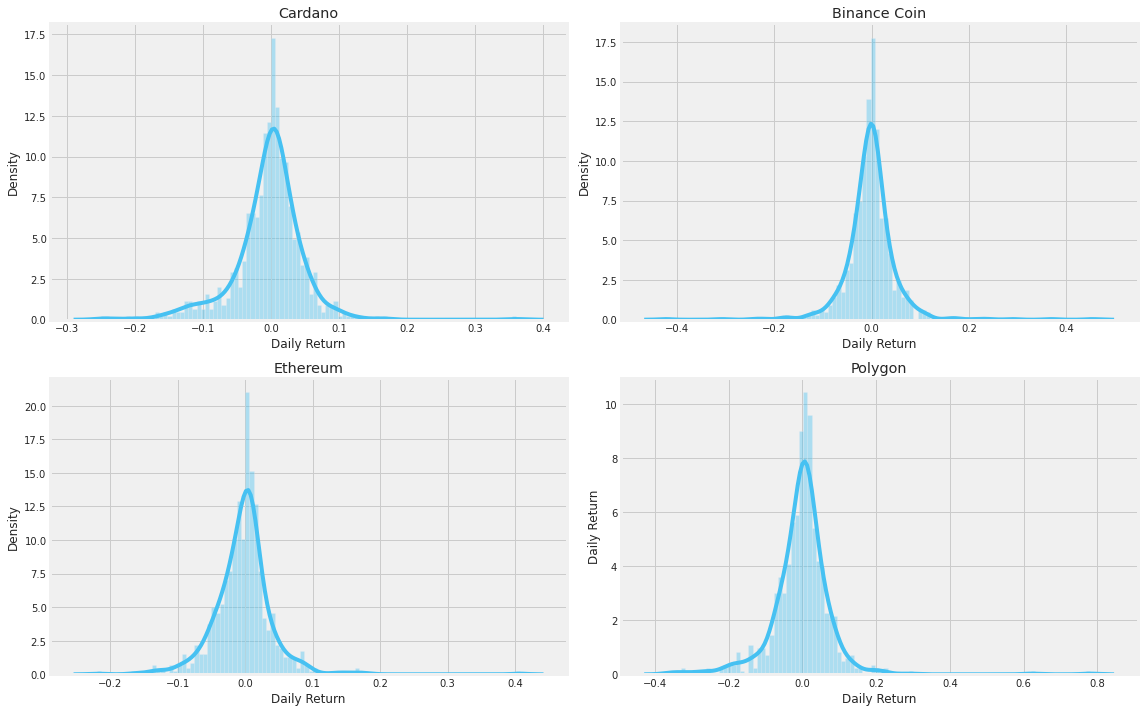

In [ ]:
# Gráficos da Densidade das Variações Diárias
crypto=['Cardano', 'Binance Coin', 'Ethereum', 'Polygon']
cryptoDf=[ada20,bnb20,eth20,matic20]
num_plots=4  # Plotagem de 4 Gráficos
total_cols=2  # Distribuídos em 2 Colunas
total_rows=2  # E 2 Linhas
for df in cryptoDf:
    df['Daily Return'] = df['High'].pct_change()
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(8*total_cols, 5*total_rows))
for i, var in enumerate(crypto):
    row = i//total_cols
    pos = i % total_cols
    plot =sns.distplot(cryptoDf[i]['Daily Return'], bins=100, color='#46c1f2',ax=axs[row][pos])
    axs[row][pos].set_title(crypto[i])
    plt.ylabel('Daily Return')


plt.tight_layout()

# **Correlação**

Usaremos o intervalo que consiste de 2019 a 2021 para estabelecer uma correlação entre todas as moedas. Para isso, usaremos o valor áximo diário de cada uma das criptos.

In [ ]:
highDf20=pd.DataFrame()
highDf20['matic']=matic20['High']
highDf20['bnb']=bnb20['High']
highDf20['eth']=eth20['High']
highDf20['ada']=ada20['High']
returns20 = highDf20.pct_change()
returns20.head()

,matic,bnb,eth,ada
Date,,,,
2021-08-24,NaN,NaN,NaN,NaN
2021-08-23,0.034061,0.009523,0.005191,0.008074
2021-08-22,-0.010390,-0.099479,-0.030657,-0.084761
2021-08-21,0.019212,0.003841,0.010816,-0.069742
2021-08-20,-0.077740,-0.005326,-0.002107,0.020027


Através desse gráfico é possível selecionar o intervalo do retorno diário percentual das duas criptomoedas para podermos visualizar a sua correlação


In [ ]:
fig = px.scatter(returns20, x="bnb", y="eth", marginal_x="histogram", marginal_y="rug", color = "bnb")
fig.show()

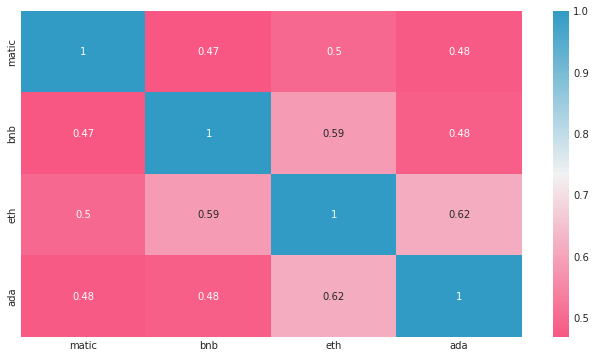

In [ ]:
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

plt.figure(figsize=(10,6))
sns.heatmap(returns20.corr(), annot=True, cmap=cmap)
plt.show()


# **Análise Risco Retorno**

In [ ]:
moedas = [eth, ada, bnb, matic] #lista das moedas 

In [ ]:
#função que separa daframe por periodo
def muda_data(start, end, moedas_df):
  for i, moeda in enumerate(moedas_df):
    print(i)
    mask = (moeda["Date"] >= start) & (moeda["Date"] <= end)
    moedas_df[i]= moeda.loc[mask]
  return moedas_df


In [ ]:
#Separando as moedas por data (no ano de 2020)
#A análise será feita apenas para o ano de 2020 pois nem todas blockchains estavam listadas nos anos anteriores
start = "2020-01-01"
end = "2021-01-01"
moedas20 = muda_data(start, end, moedas)
moedas20[3]

0
1
2
3


,SNo,Date,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,,
2021-01-01,555,2021-01-01,0.01776,0.01758,0.01871,0.01733,157500000.0,1.01
2020-12-31,554,2020-12-31,0.01758,0.01808,0.01809,0.01695,170280000.0,-2.77
2020-12-30,553,2020-12-30,0.01808,0.01846,0.01900,0.01785,149210000.0,-2.07
2020-12-29,552,2020-12-29,0.01846,0.01888,0.01910,0.01777,193150000.0,-2.22
2020-12-28,551,2020-12-28,0.01888,0.01832,0.01962,0.01810,245290000.0,3.35
...,...,...,...,...,...,...,...,...
2020-01-05,193,2020-01-05,0.01477,0.01488,0.01518,0.01469,238260000.0,-0.70
2020-01-04,192,2020-01-04,0.01488,0.01513,0.01546,0.01460,280510000.0,-1.69
2020-01-03,191,2020-01-03,0.01513,0.01467,0.01540,0.01423,433400000.0,3.16


In [ ]:
#Criando um data frame com as variações diarias das moedas
df20=pd.DataFrame()
df20['eth'] = moedas20[0]["Change %"]
df20['ada'] = moedas20[1]["Change %"]
df20['bnb'] = moedas20[2]["Change %"]
df20['matic'] = moedas20[3]["Change %"]

df20

,eth,ada,bnb,matic
Date,,,,
2021-01-01,-0.93,-3.49,1.04,1.01
2020-12-31,-2.11,-1.44,-2.01,-2.77
2020-12-30,2.74,-3.64,-2.56,-2.07
2020-12-29,0.23,8.26,8.80,-2.22
2020-12-28,6.78,14.09,6.72,3.35
...,...,...,...,...
2020-01-05,0.94,0.73,1.58,-0.70
2020-01-04,0.04,0.79,1.49,-1.69
2020-01-03,5.56,4.32,4.72,3.16


In [ ]:
#Relação risco retorno plotada no plotly
rets = df20.dropna()
x = rets.mean()
y = rets.std()
fig = px.scatter(data_frame =rets, x=x, y =y,  color = rets.columns, 
               color_discrete_sequence=px.colors.qualitative.Alphabet_r,size=rets.mean()/rets.mean())


fig.update_yaxes(title_text = 'Média de retorno', ticksuffix = '')
fig.update_xaxes(title_text = 'Desvio padrão (Risco)', ticksuffix = '')
fig.update_layout(showlegend = True,
    title = {
        'text': 'Relação risco retorno em 2020',
        'y':1.0,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_layout(showlegend = True)
fig.show()

Aqui consideramos o risco como o desvio padrão do ativo e comparamos com sua média de retorno e vemos que dado os dados das moedas em 2020 podemos ver que a moeda matic ganhou sem sobra de dúvida.

Ao ter realizado essa avaliação no começo de 2021, alguém que tivesse investido em matic ainda continuaria na vantagem?

In [ ]:
moedas = [eth, ada, bnb, matic] #lista das moedas 

In [ ]:
#Agora as moedas serão separadas apenas no ano de 2021 até a ultima data dos datos
start = "2021-01-01"
end = "2021-08-24"
moedas21 = muda_data(start, end, moedas)
moedas21[2]


0
1
2
3


,SNo,Date,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,,
2021-08-24,1385,2021-08-24,494.93,499.79,504.05,491.41,2190000.0,-0.97
2021-08-23,1384,2021-08-23,499.79,448.68,508.85,447.02,2720000.0,11.39
2021-08-22,1383,2021-08-22,448.68,448.64,458.23,438.03,1170000.0,0.01
2021-08-21,1382,2021-08-21,448.64,454.89,459.99,444.81,1470000.0,-1.37
2021-08-20,1381,2021-08-20,454.87,431.42,457.54,421.98,1730000.0,5.44
...,...,...,...,...,...,...,...,...
2021-01-05,1154,2021-01-05,41.79,41.12,41.79,38.86,4880000.0,1.68
2021-01-04,1153,2021-01-04,41.10,41.25,43.21,38.09,6870000.0,-0.29
2021-01-03,1152,2021-01-03,41.22,38.24,41.64,37.78,6340000.0,7.81


In [ ]:
#Criando um data frame com as variações diarias das moedas
df21=pd.DataFrame()
df21['eth'] = moedas21[0]["Change %"]
df21['ada'] = moedas21[1]["Change %"]
df21['bnb'] = moedas21[2]["Change %"]
df21['matic'] = moedas21[3]["Change %"]

df21

,eth,ada,bnb,matic
Date,,,,
2021-08-24,0.30,-0.60,-0.97,-2.05
2021-08-23,2.49,7.70,11.39,-0.07
2021-08-22,0.46,11.12,0.01,2.54
2021-08-21,-1.83,-0.78,-1.37,2.23
2021-08-20,3.12,0.67,5.44,5.49
...,...,...,...,...
2021-01-05,5.48,14.52,1.68,-1.21
2021-01-04,6.92,9.82,-0.29,23.60
2021-01-03,25.88,15.97,7.81,4.89


In [ ]:
rets21 = df21.dropna()
x = rets21.mean()
y = rets21.std()
fig = px.scatter(data_frame =rets, x=x, y =y,  color = rets.columns, 
               color_discrete_sequence=px.colors.qualitative.Alphabet_r, size = rets.mean()/rets.mean())


fig.update_yaxes(title_text = 'Média de retorno', ticksuffix = '')
fig.update_xaxes(title_text = 'Desvio padrão (Risco)', ticksuffix = '')
fig.update_layout(showlegend = True,
    title = {
        'text': 'Relação risco retorno em 2021',
        'y':1.0,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_layout(showlegend = True)
fig.show()

Podemos ver que de 2020 para 2021 a relação risco-retorno dos ativos se alterou completamente. O mercado ainda é bem volátil e não se devia confiar que a relação iria se manter no ano seguinte.

# **Conclusão**
Com essa análise concluimos que o mercado de contratos inteligentes ainda é muito volátil, assim não se pode garantir que relações de risco retorno passadas se repitam no futuro. O fato mais relevante, foi a boa correlação entre os ativos e que o mercado está crescendo cada vez mais assim como o preço.

# **Webgrafia**


https://stackoverflow.com/questions/64535462/plotly-how-to-change-line-style-using-px-line
https://plotly.com/python/time-series/
https://stackoverflow.com/questions/64535462/plotly-how-to-change-line-style-using-px-line
https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
https://www.kaggle.com/deepshah16/cryptocurrency-analysis/notebook
https://qastack.com.br/programming/13411544/delete-column-from-pandas-dataframe
https://www.ti-enxame.com/pt/python/como-mesclar-dois-quadros-de-dados-com-base-em-uma-coluna-especifica-em-pandas-python/826012611/
https://cursos.alura.com.br/forum/topico-ordenar-uma-coluna-em-ordem-crescente-e-a-coluna-ao-lado-siga-o-novo-index-94377
https://www.ti-enxame.com/pt/python/inverta-ordem-das-linhas-do-dataframe-com-pandas/822437980/

